In [3]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : e7f86ffc39baabf57f231654bb713dfdfebd92e9 

Commit short SHA: e7f86
Branch:  mensualisation_casd
Date (y/m/d): 2016-02-27 14:06:28  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : fa40291fc0a323a76aa1764ddde4781869f16a69  Date: 2016-05-11 16:26:57 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 


In [4]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
from openfisca_core import periods



from openfisca_plugin_aggregates.tests.test_aggregates import create_survey_scenario as annual_create_survey_scenario
from openfisca_plugin_aggregates.tests.test_monthly_aggregates import create_survey_scenario as monthly_create_survey_scenario


import pandas as pd

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

In [5]:
period = periods.period(2009)

In [6]:
annual_survey_scenario = annual_create_survey_scenario(2009)
annual_survey_scenario.new_simulation()

In [7]:
monthly_survey_scenario = monthly_create_survey_scenario(2009)
monthly_survey_scenario.new_simulation()

### IRPP censé être égaux (diff peut être dues aux arrondis).

In [8]:
assert monthly_survey_scenario.simulation.calculate('irpp').shape == annual_survey_scenario.simulation.calculate('irpp').shape
print monthly_survey_scenario.compute_aggregate('irpp')
print annual_survey_scenario.compute_aggregate('irpp')
(annual_survey_scenario.compute_aggregate('irpp')-monthly_survey_scenario.compute_aggregate('irpp'))

-48038862065.7
-48038958442.0


-96376.301544189453

In [9]:
(monthly_survey_scenario.simulation.calculate('irpp') > 10).sum()/monthly_survey_scenario.simulation.calculate('irpp').shape

array([ 0.0373952])

In [10]:
(annual_survey_scenario.simulation.calculate('irpp') > 10).sum()/monthly_survey_scenario.simulation.calculate('irpp').shape

array([ 0.0373952])

(-20000, 5000)

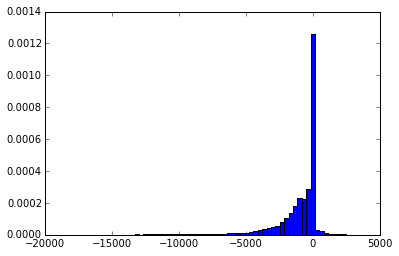

In [11]:
plt.hist(annual_survey_scenario.simulation.calculate('irpp'), bins = 1000, normed = True, stacked=True )
plt.xlim(-20000,5000)

(-20000, 5000)

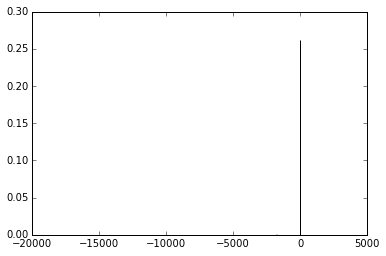

In [12]:
plt.hist(annual_survey_scenario.simulation.calculate('irpp')- monthly_survey_scenario.simulation.calculate('irpp'), bins = 1000, normed = True, stacked=True )
plt.xlim(-20000,5000)

(-20000, 5000)

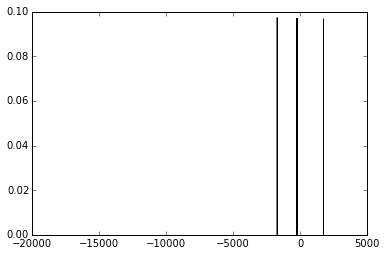

In [15]:
import math
plt.hist((annual_survey_scenario.simulation.calculate('irpp')- monthly_survey_scenario.simulation.calculate('irpp'))[abs(annual_survey_scenario.simulation.calculate('irpp')- monthly_survey_scenario.simulation.calculate('irpp'))>1], bins = 1000, normed = True, stacked=True )
plt.xlim(-20000,5000)

In [18]:
(annual_survey_scenario.simulation.calculate('irpp')- monthly_survey_scenario.simulation.calculate('irpp'))[abs(annual_survey_scenario.simulation.calculate('irpp')- monthly_survey_scenario.simulation.calculate('irpp'))>1]

array([-1713.89868164,  1713.89868164,  -273.        ], dtype=float32)

In [8]:
print monthly_survey_scenario.compute_aggregate("salaire_imposable")/10**9
print annual_survey_scenario.compute_aggregate("salaire_imposable")/10**9

552.977876958
552.97787683


In [9]:
print monthly_survey_scenario.compute_aggregate("chomage_imposable")/10**9
print annual_survey_scenario.compute_aggregate("chomage_imposable")/10**9

27.5220450404
27.522045019


In [10]:
print monthly_survey_scenario.compute_aggregate("retraite_imposable")/10**9
print annual_survey_scenario.compute_aggregate("retraite_imposable")/10**9

224.870536833
224.870536783


In [12]:
print monthly_survey_scenario.compute_aggregate('rsa')/10**9
print annual_survey_scenario.compute_aggregate('rsa')/10**9

13.7228245823
10.0660113344


In [11]:
variable = ['charges_deduc', 'csg_deduc', 'rbg']
for var in variable:
    print var
    print var + " annuelle ", annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

charges_deduc
charges_deduc annuelle  9534574078.75
0.0
csg_deduc
csg_deduc annuelle  1808067710.5
0.840435307658
rbg
rbg annuelle  765980694486.0
238.042521439


## Il y a une perte de revenu dans la moulinette

In [12]:
variable = ['deficit_ante', 'f6gh', 'nacc_pvce', 'nbic_impm', 'rev_cat']
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

deficit_ante
1004060900.0
0.0
f6gh
2173920.0
0.0
nacc_pvce
14190396.0
0.0
nbic_impm
0.0
0.0
rev_cat
764860841574.0
238.791215452


In [13]:
variable = ['rev_cat_pv', 'rev_cat_rfon', 'rev_cat_rpns', 'rev_cat_rvcm', "rev_cat_tspr"]
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

rev_cat_pv
0.0
0.0
rev_cat_rfon
0.0
0.0
rev_cat_rpns
49754386450.6
0.0
rev_cat_rvcm
0.0
0.0
rev_cat_tspr
715106455131.0
238.791215418


In [14]:

variable = ["indu_plaf_abat_pen", "tspr"]
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

indu_plaf_abat_pen
1718168315.0
1.710892913
tspr
713388286816.0
237.080322441


In [15]:

variable = ["retraite_imposable"]
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

retraite_imposable
224870536783.0
224.870536783


In [16]:

variable = ["salaire_imposable"]
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

salaire_imposable
552977876830.0
11.2379955306


In [17]:
print pd.Series((annual_survey_scenario.simulation.calculate('retraite_imposable')>10)).value_counts()
print pd.Series((monthly_survey_scenario.simulation.calculate('retraite_imposable')>10)).value_counts()


False    83727
True     28632
dtype: int64
False    112359
dtype: int64


In [18]:
print pd.Series((annual_survey_scenario.simulation.calculate('chomage_imposable')>10)).value_counts()
print pd.Series((monthly_survey_scenario.simulation.calculate('chomage_imposable')>10)).value_counts()

False    104470
True       7889
dtype: int64
False    112359
dtype: int64


In [19]:
print pd.Series((annual_survey_scenario.simulation.calculate('salaire_imposable')>10)).value_counts()
print pd.Series((monthly_survey_scenario.simulation.calculate('salaire_imposable')>10)).value_counts()

False    65344
True     47015
dtype: int64
False    68972
True     43387
dtype: int64


Chomage et retraite non prise en compte par le modèle, on perds 4 milles observations dans les salaires imposables...

## TODO : 

### abat_spe est nul avec ERFS

In [20]:
var = 'abat_spe'
print annual_survey_scenario.compute_aggregate(var)
(annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

0.0


0.0

In [21]:
var = 'abat_spe'
print annual_survey_scenario.compute_aggregate(var)
(annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

0.0


0.0

In [22]:
variable = ['rev_cat_pv', 'rev_cat_rfon', 'rev_cat_rpns', 'rev_cat_rvcm', "rev_cat_tspr"]
for var in variable:
    print var
    print annual_survey_scenario.compute_aggregate(var)
    print (annual_survey_scenario.compute_aggregate(var)-monthly_survey_scenario.compute_aggregate(var))/10**9

rev_cat_pv
0.0
0.0
rev_cat_rfon
0.0
0.0
rev_cat_rpns
49754386450.6
0.0
rev_cat_rvcm
0.0
0.0
rev_cat_tspr
715106455131.0
238.791215418
